In [13]:
from sklearn.svm import NuSVR
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from utils import utils_gn, utils_noah, utils_ivc, utils_models
import importlib
importlib.reload(utils_gn)
importlib.reload(utils_noah)
importlib.reload(utils_ivc)
importlib.reload(utils_models)

<module 'utils.utils_models' from '/home/s2228293/Documents/MACMIGS-Year1/Semester2/Extended_Project/MAC-MIGS-extended-project/utils/utils_models.py'>

In [14]:
# load data 
CCV_df = utils_gn.read_data('CCV_df.pkl')
CCV_dict = utils_gn.read_data('CCV_dict.pkl')

In [15]:
df = CCV_df.copy()
df.head()

,min_y_0,min_y_50,min_y_100,min_y_100m0,min_y_diff,max_y_0,max_y_50,max_y_100,max_y_100m0,max_y_diff,...,kurt_y_50,kurt_y_100,kurt_y_100m0,kurt_y_diff,area_y_0,area_y_50,area_y_100,area_y_100m0,area_y_diff,end_of_life
b1c0,2.004154,2.003347,2.007278,0.003124,0.004739,3.472089,3.474127,3.467073,-0.005016,-0.009092,...,3.361805,3.348114,-0.117881,0.090500,44.136193,44.249844,44.139137,0.002944,-0.224358,1851.0
b1c1,2.004933,2.003611,2.007169,0.002236,0.004881,3.473169,3.472845,3.469775,-0.003394,-0.002747,...,3.405111,3.408833,-0.024813,0.032257,44.386863,44.444088,44.315106,-0.071757,-0.186208,2159.0
b1c2,2.004799,2.004509,2.004467,-0.000332,0.000249,3.475864,3.473185,3.473184,-0.002681,0.002679,...,3.442861,3.360607,-0.047585,-0.116922,44.576302,44.614345,44.483995,-0.092307,-0.168392,2236.0
b1c3,2.006533,2.006666,2.004641,-0.001892,-0.002158,3.477354,3.475420,3.478338,0.000984,0.004853,...,3.376638,3.345573,-0.034129,-0.028001,44.599753,44.575911,44.430327,-0.169426,-0.121741,1433.0
b1c4,2.005693,2.002969,2.005716,0.000023,0.005472,3.474642,3.465154,3.471026,-0.003615,0.015360,...,3.349011,3.304888,-0.148597,0.060351,44.393589,44.413286,44.295437,-0.098152,-0.137547,1708.0


In [16]:
# Remove cells with more 1250 eol
df = df[df['end_of_life'] <= 1250]

In [5]:
# drop the features with prefix min
#df = df.drop([item for item in df.columns if item[:3]=='min' or item[:3]=='max'], axis=1)
#df

In [6]:
df.columns

Index(['min_y_0', 'min_y_50', 'min_y_100', 'min_y_100m0', 'min_y_diff',
       'max_y_0', 'max_y_50', 'max_y_100', 'max_y_100m0', 'max_y_diff',
       'mean_y_0', 'mean_y_50', 'mean_y_100', 'mean_y_100m0', 'mean_y_diff',
       'var_y_0', 'var_y_50', 'var_y_100', 'var_y_100m0', 'var_y_diff',
       'skew_y_0', 'skew_y_50', 'skew_y_100', 'skew_y_100m0', 'skew_y_diff',
       'kurt_y_0', 'kurt_y_50', 'kurt_y_100', 'kurt_y_100m0', 'kurt_y_diff',
       'area_y_0', 'area_y_50', 'area_y_100', 'area_y_100m0', 'area_y_diff',
       'end_of_life'],
      dtype='object')

## NuSVR

In [83]:
# define parameters for model pipeline
estimator = NuSVR()
param_grid = {"nu": [0.1, 0.3, 0.5, 0.7, 0.9],
              "C": [0.001, 0.01, 0.1, 1.0],
              "kernel": ["linear", "poly", "rbf", "sigmoid"]}
algo = utils_models.fit_nusvr
#title = 'Support Vector Regression'
fname = 'ccv_eol_nusvr'

0 features removed from a total of 25
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
3 features removed from a total of 25
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
5 features removed from a total of 25
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
8 features removed from a total of 25
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
10 features removed from a total of 25
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
13 features removed from a total of 25
NuSVR training has started...
NuSVR training has ended after 0.0 seconds


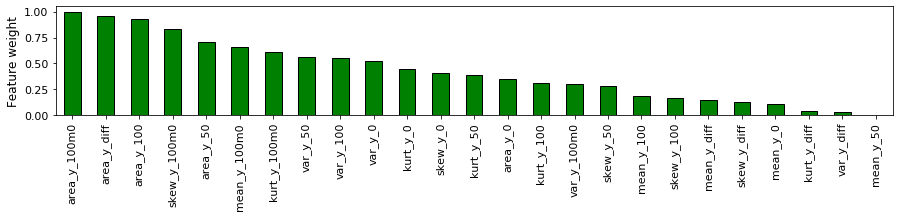

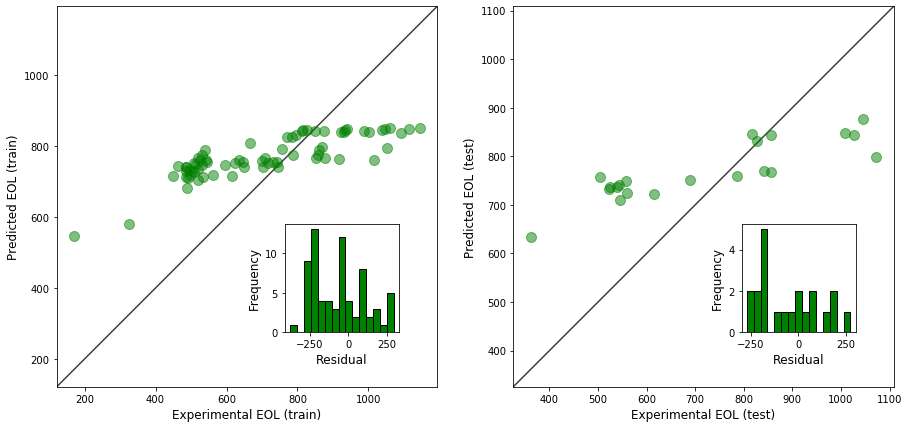

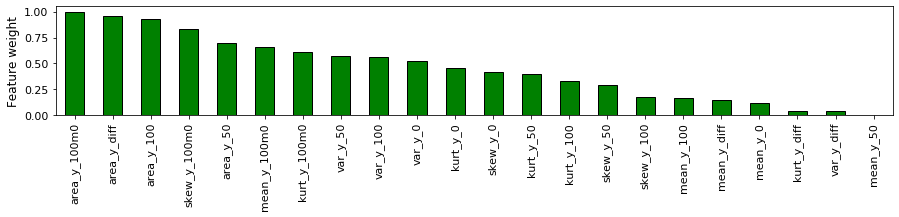

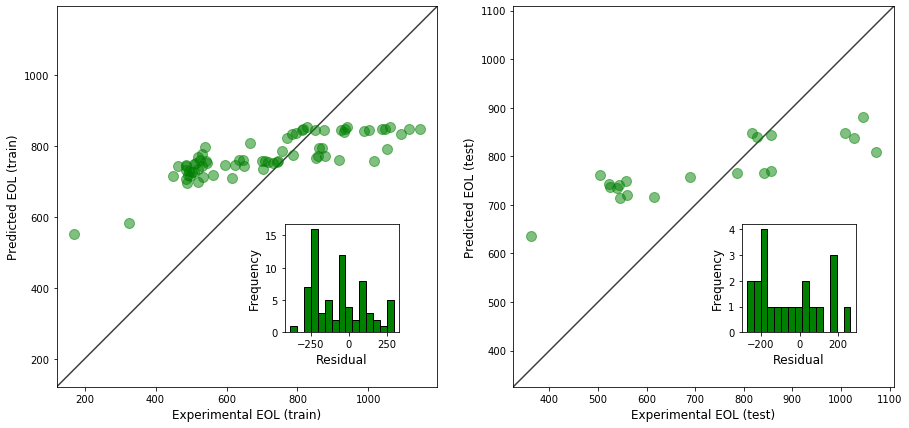

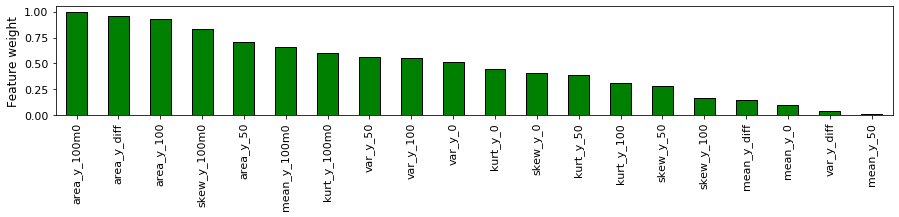

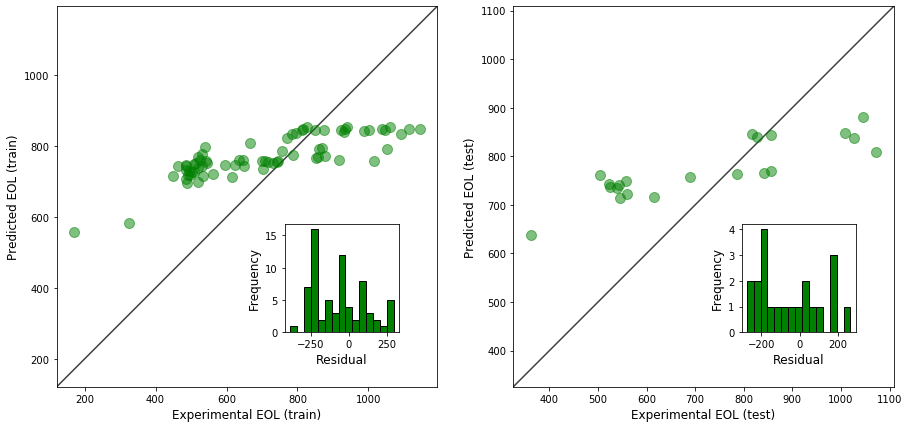

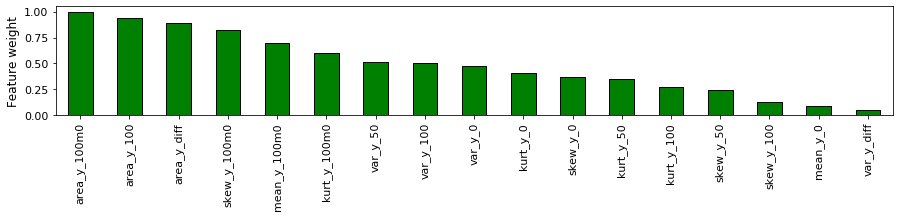

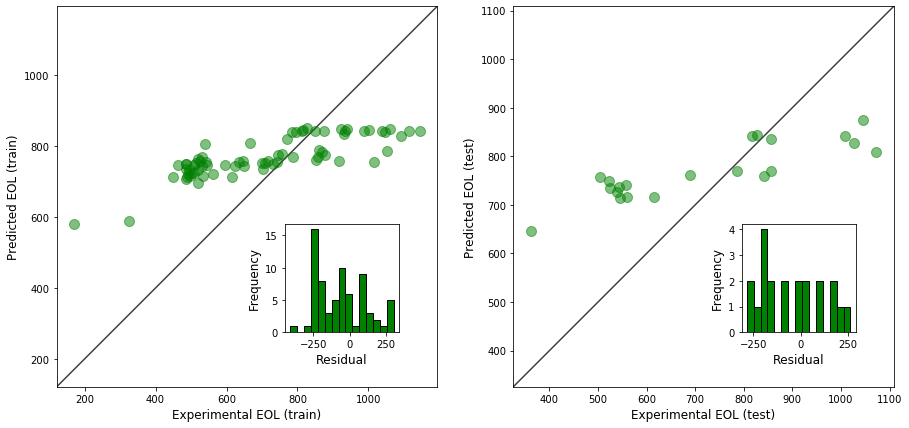

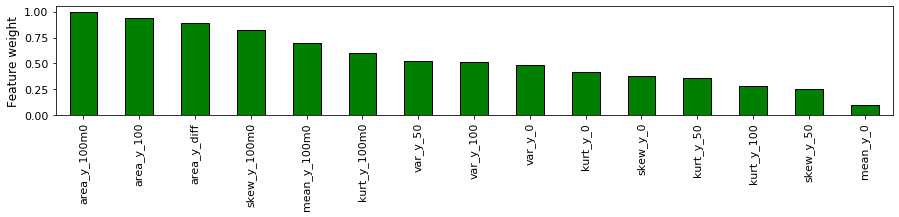

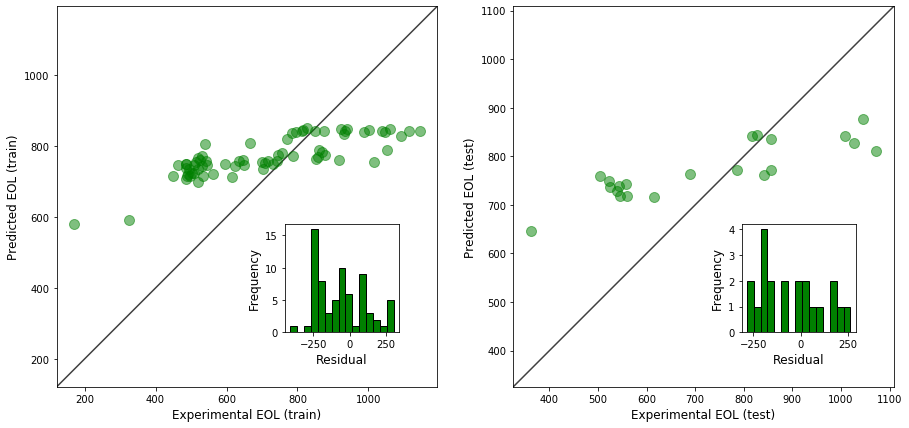

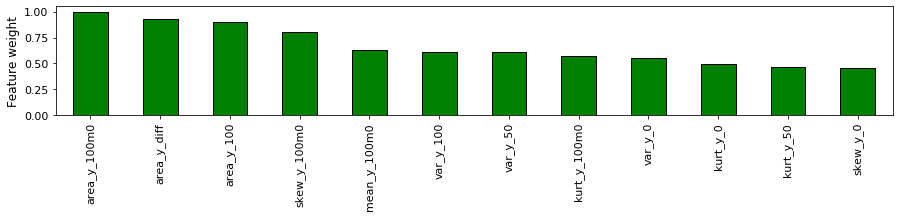

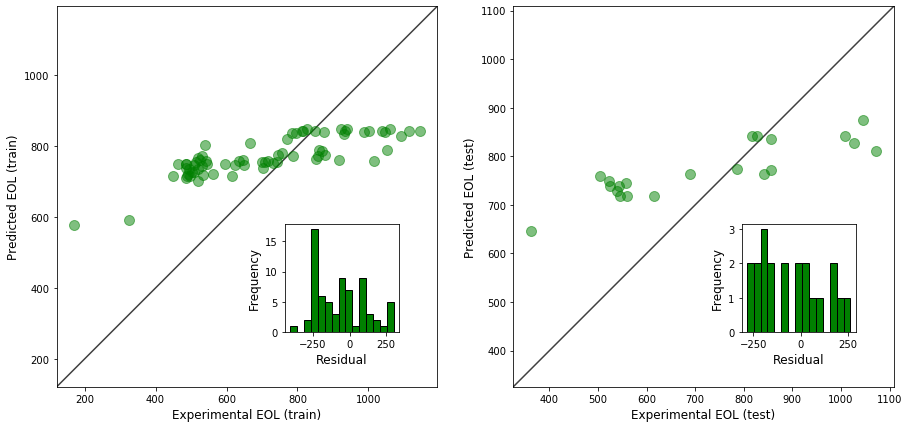

In [84]:
# call the model pipeline function
best_k, best_param, metrics = utils_models.model_pipeline(df=df,
                                                          algo=algo,
                                                          estimator=estimator,
                                                          param_grid=param_grid,
                                                          fname=fname,
                                                          scaling=True)

In [85]:
best_param

{'C': 1.0, 'kernel': 'linear', 'nu': 0.1}

In [86]:
metrics

,Train_MAE,Train_MAPE,Train_MSE,Train_RMSE,Train_R2 score,Train_Corr,Test_MAE,Test_MAPE,Test_MSE,Test_RMSE,Test_R2 score,Test_Corr
Features used,,,,,,,,,,,,
1.0,153.007302,0.273462,31816.284446,178.371198,0.292074,0.823075,145.364307,0.239321,28020.042132,167.391882,0.342232,0.859118
0.9,153.075327,0.274133,31942.597043,178.724920,0.289264,0.817443,145.664236,0.240258,28019.009512,167.388797,0.342257,0.860027
0.8,153.451871,0.274991,32100.220549,179.165344,0.285757,0.816528,146.155685,0.241143,28191.942092,167.904562,0.338197,0.858396
0.7,154.835551,0.278049,32776.500225,181.042813,0.270709,0.806110,146.532032,0.241151,28286.639345,168.186323,0.335974,0.863385
0.6,155.405527,0.279150,32962.797691,181.556596,0.266564,0.807449,147.080195,0.242368,28538.479191,168.933357,0.330062,0.863515
0.5,155.718847,0.279659,33073.415096,181.860977,0.264103,0.810572,147.428813,0.243053,28740.235931,169.529454,0.325326,0.864070


## ExtraTrees

In [17]:
# define parameters for model pipeline
estimator = ExtraTreesRegressor()
param_grid = {"n_estimators": [10, 20, 30, 40, 50, 100],
            "max_depth": [2, 3, 4, 5],
            "min_samples_split": [2, 3, 4, 5]}
algo = utils_models.fit_tree_based_regression
fname = 'ccv_eol_ext'

0 features removed from a total of 35
Tree-based regression has started...
Tree-based regression has ended after 0.01 seconds
4 features removed from a total of 35
Tree-based regression has started...
Tree-based regression has ended after 0.01 seconds
7 features removed from a total of 35
Tree-based regression has started...
Tree-based regression has ended after 0.01 seconds
11 features removed from a total of 35
Tree-based regression has started...
Tree-based regression has ended after 0.01 seconds
14 features removed from a total of 35
Tree-based regression has started...
Tree-based regression has ended after 0.02 seconds
18 features removed from a total of 35
Tree-based regression has started...
Tree-based regression has ended after 0.02 seconds


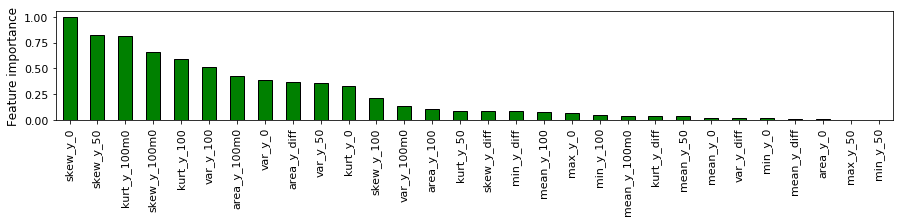

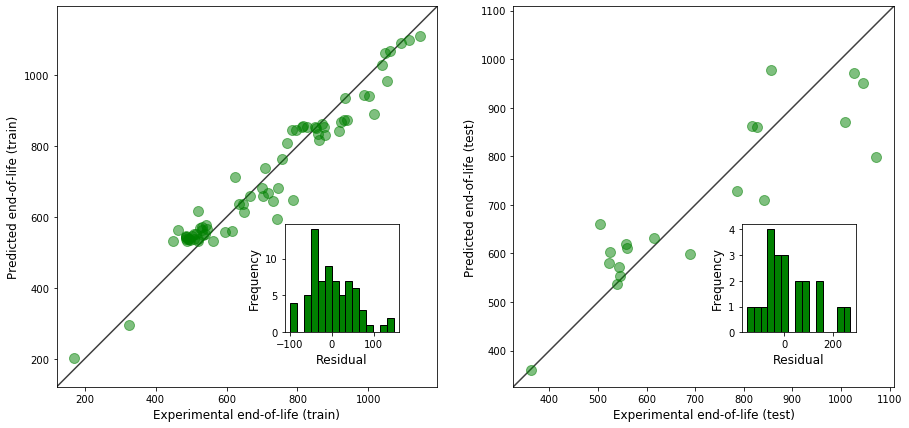

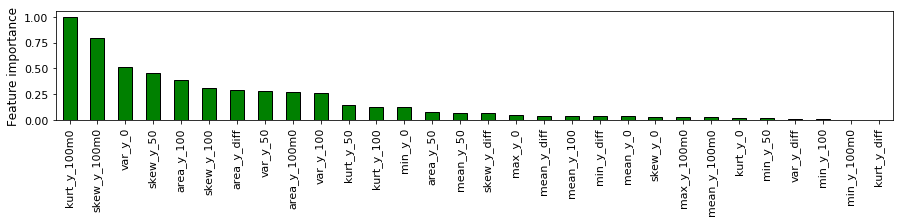

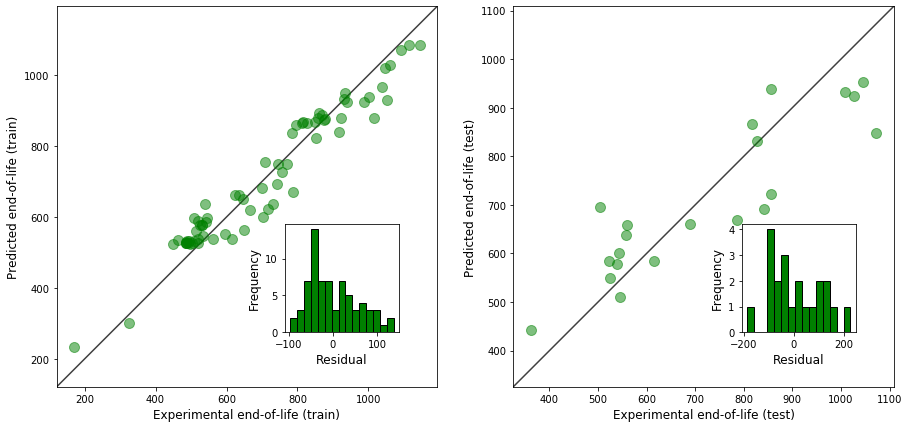

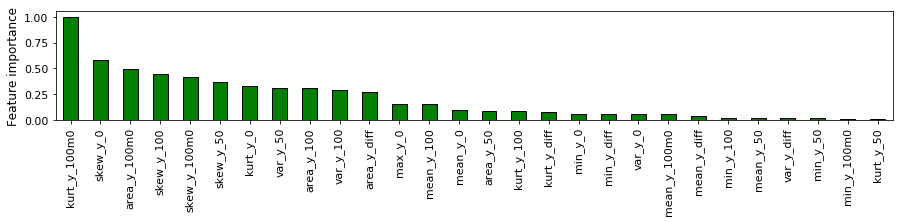

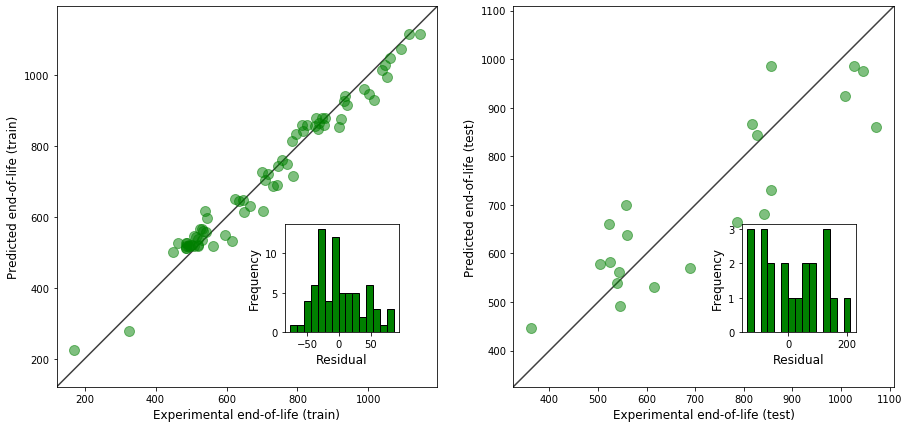

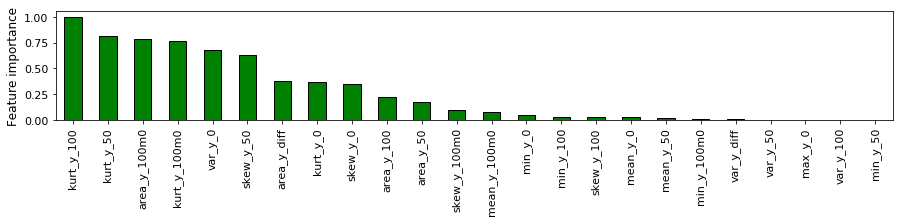

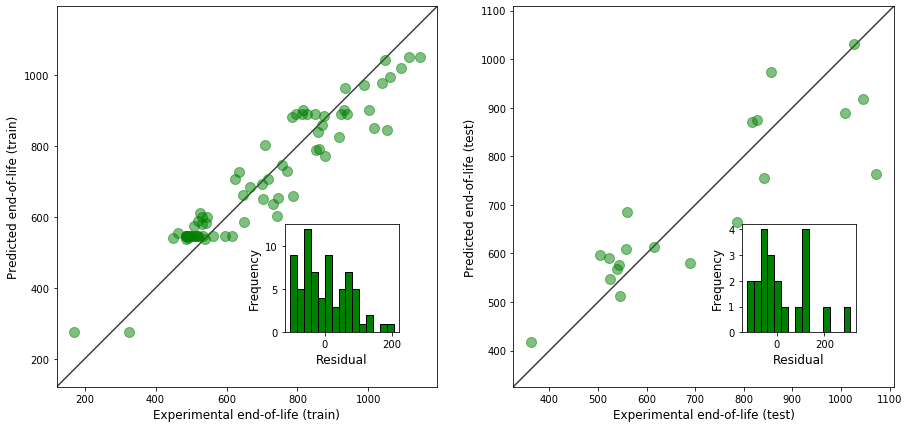

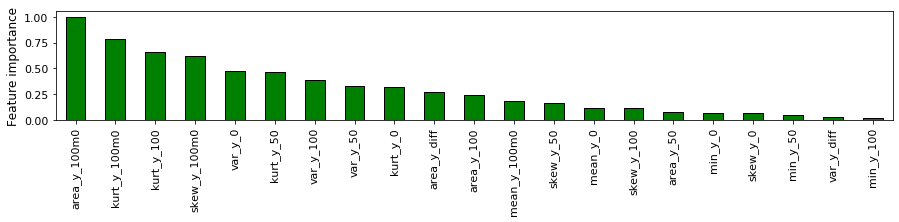

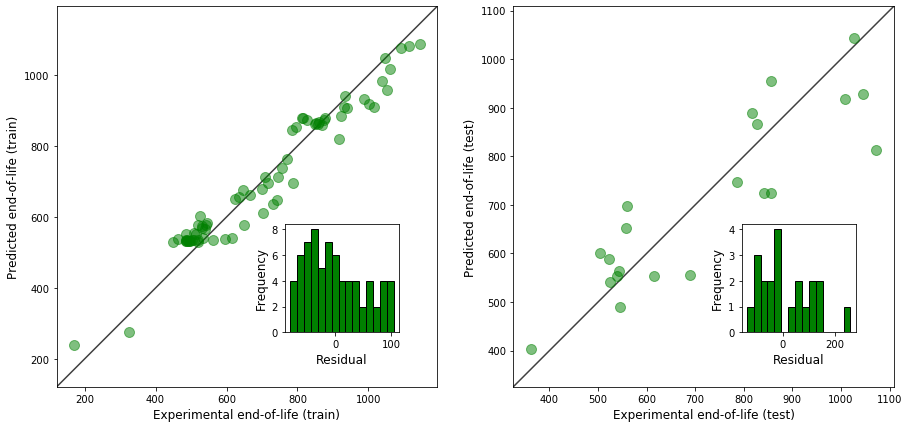

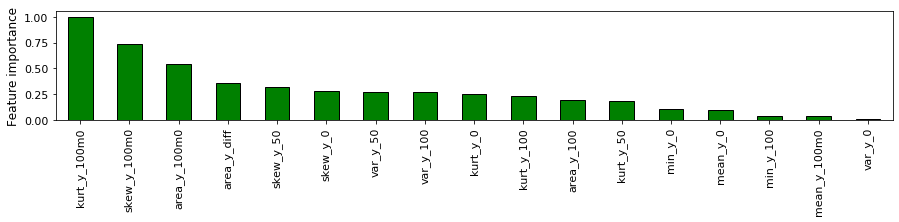

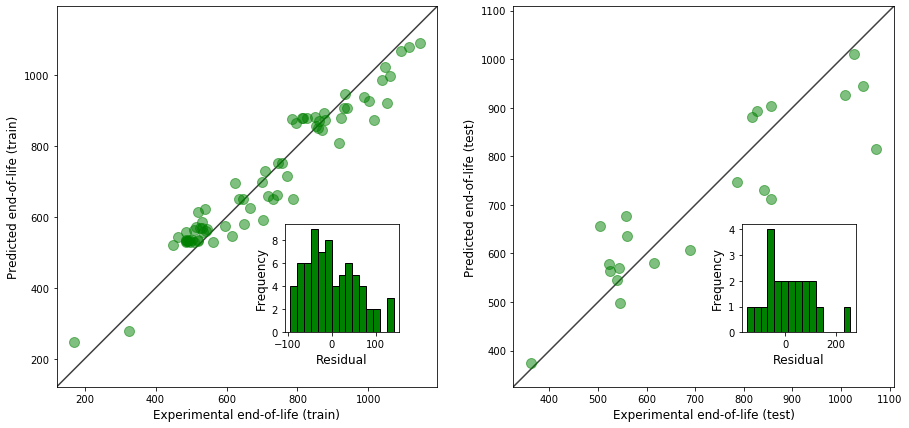

In [18]:
# call the model pipeline function
best_k, best_param, metrics = utils_models.model_pipeline(df=df,
                                                          algo=algo,
                                                          estimator=estimator,
                                                          param_grid=param_grid,
                                                          fname=fname,
                                                          model_type='ext',
                                                          scaling=True)

In [89]:
best_param

{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 30}

In [90]:
metrics

,Train_MAE,Train_MAPE,Train_MSE,Train_RMSE,Train_R2 score,Train_Corr,Test_MAE,Test_MAPE,Test_MSE,Test_RMSE,Test_R2 score,Test_Corr
Features used,,,,,,,,,,,,
1.0,0.925843,0.001421,1.652287,1.285413,0.999963,0.999982,63.090162,0.096168,7064.332925,84.049586,0.834166,0.915674
0.9,4.549614,0.007089,35.347459,5.945373,0.999214,0.999632,64.197103,0.094275,6263.863028,79.144570,0.852956,0.927613
0.8,28.642208,0.036871,1533.608289,39.161311,0.965877,0.994538,68.571026,0.096333,8340.387935,91.325724,0.804210,0.931426
0.7,40.892617,0.054333,3041.080572,55.145993,0.932335,0.977770,68.835619,0.099160,7302.316328,85.453592,0.828579,0.933789
0.6,30.911373,0.040239,1806.009590,42.497172,0.959816,0.991078,73.333118,0.106393,8959.155826,94.652817,0.789685,0.910477
0.5,29.575396,0.037952,1640.340215,40.501114,0.963502,0.993166,79.386803,0.114456,9412.428001,97.017668,0.779044,0.903029


## XGBoost

In [91]:
# define parameters for model pipeline
estimator = XGBRegressor()
param_grid = {"n_estimators": [20, 30, 40, 50],
            "max_depth": [2, 3, 4, 5],
            "min_samples_split": [2, 3, 4, 5],
            "learning_rate": [0.01, 0.1, 1.0]}
algo = utils_models.fit_tree_based_regression
fname = 'ccv_eol_xgb'

0 features removed from a total of 25
Tree-based regression has started...
Tree-based regression has ended after 0.26 seconds
3 features removed from a total of 25
Tree-based regression has started...
Tree-based regression has ended after 0.47 seconds
5 features removed from a total of 25
Tree-based regression has started...
Tree-based regression has ended after 0.46 seconds
8 features removed from a total of 25
Tree-based regression has started...
Tree-based regression has ended after 0.39 seconds
10 features removed from a total of 25
Tree-based regression has started...
Tree-based regression has ended after 0.42 seconds
13 features removed from a total of 25
Tree-based regression has started...
Tree-based regression has ended after 0.38 seconds


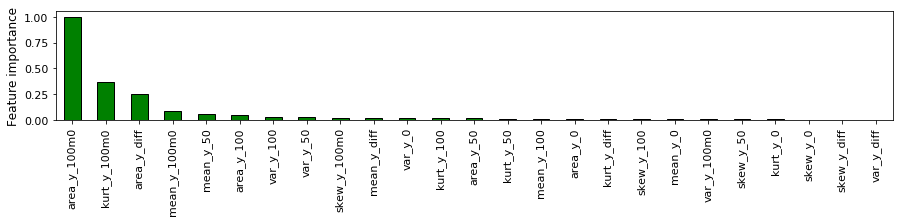

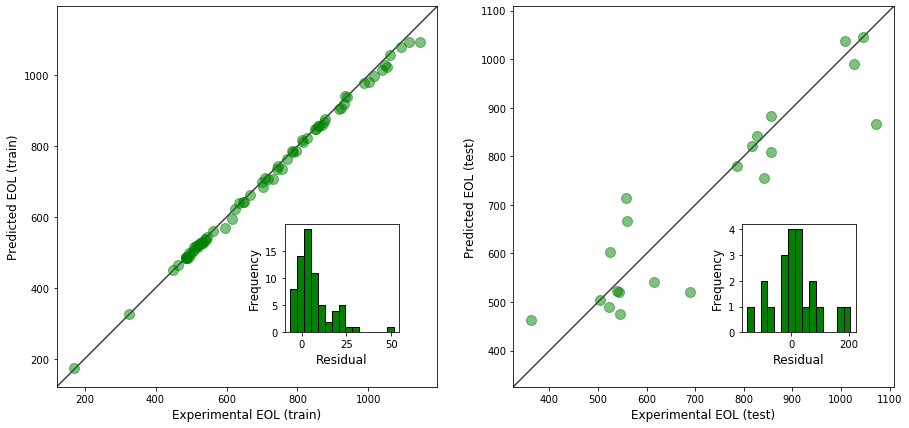

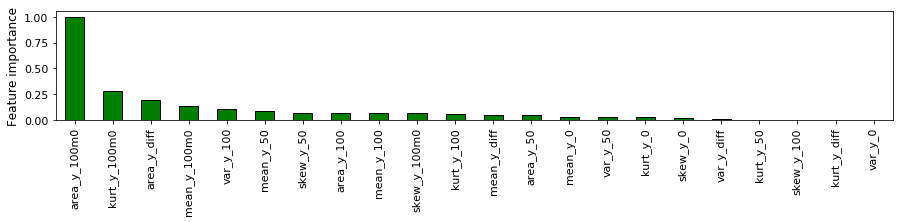

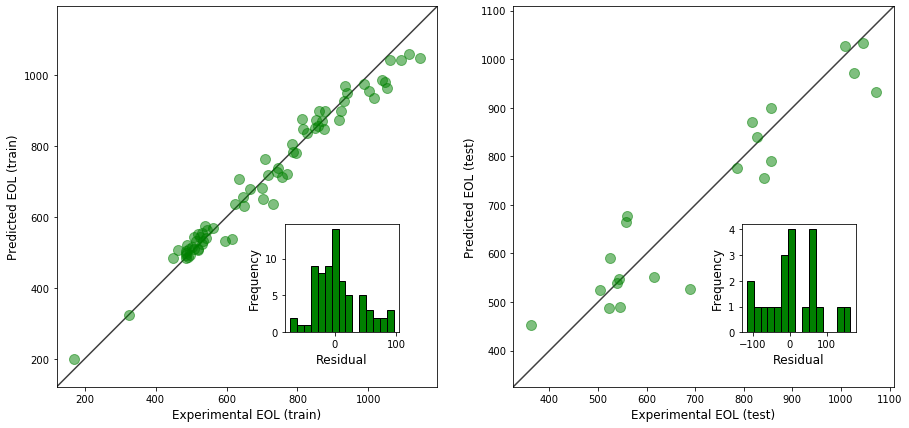

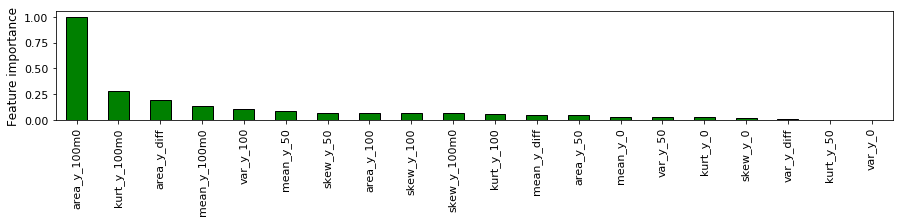

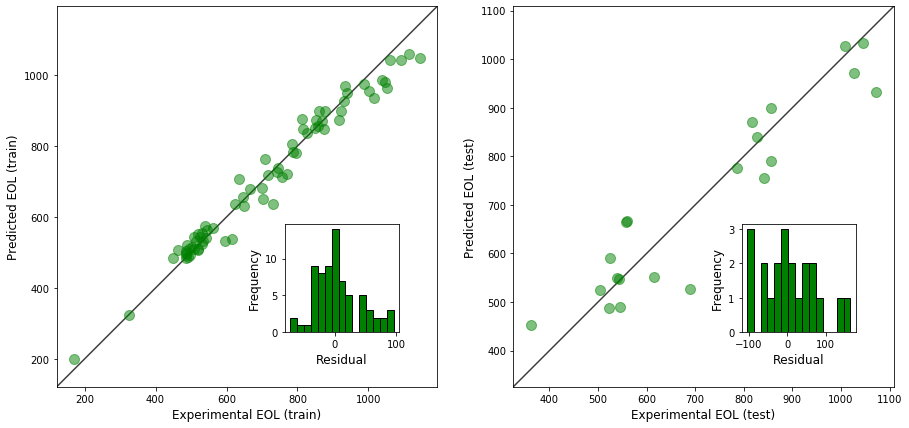

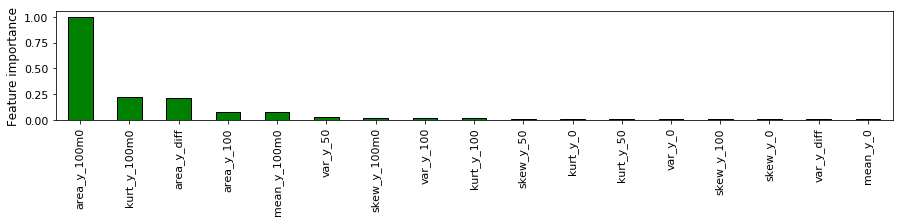

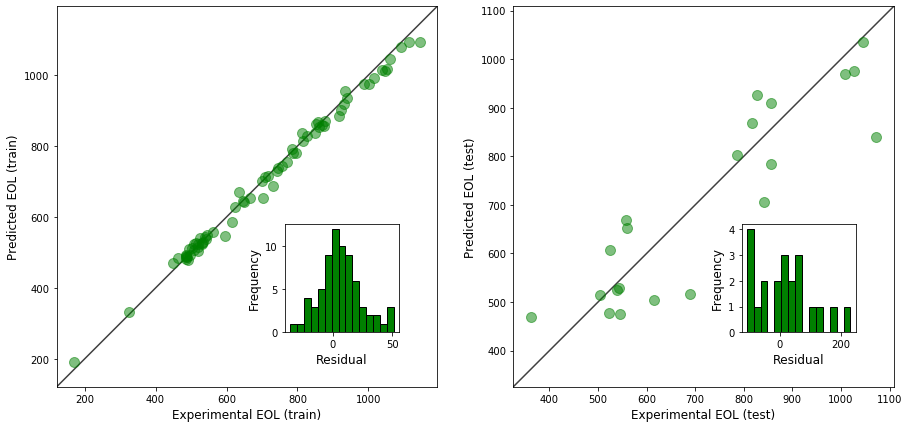

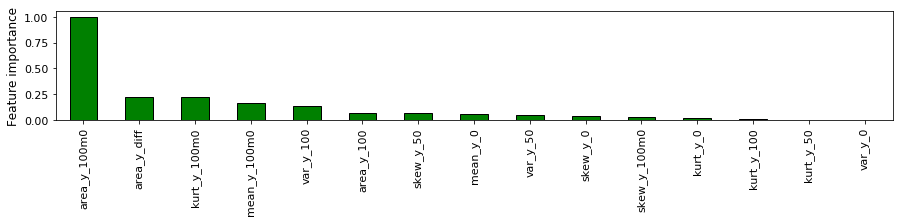

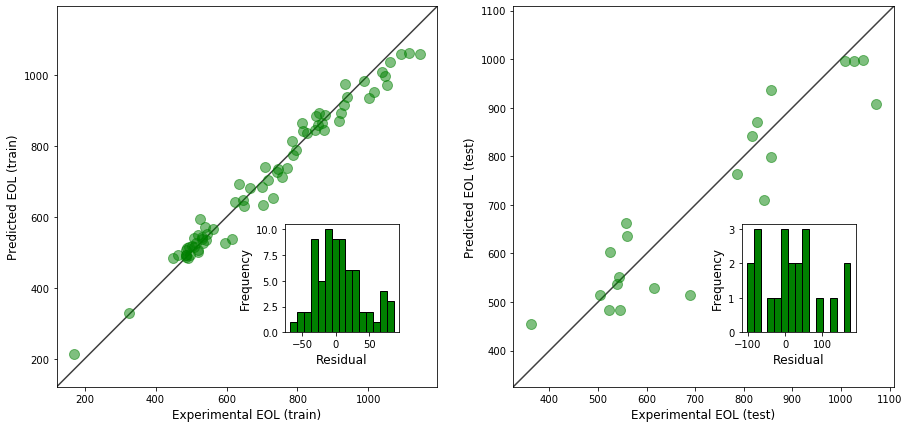

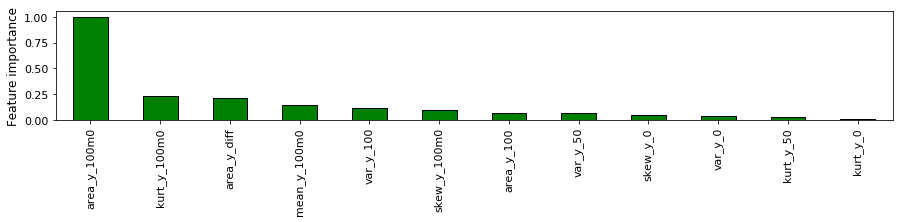

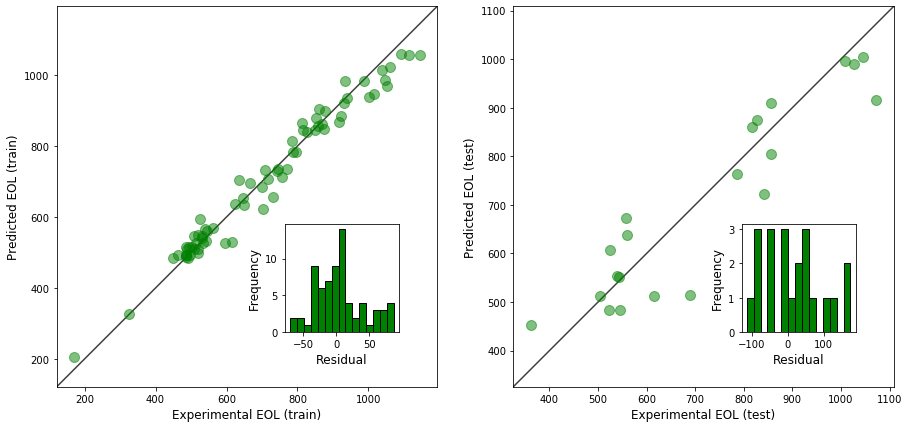

In [92]:
# call the model pipeline function
best_k, best_param, metrics = utils_models.model_pipeline(df=df,
                                                          algo=algo,
                                                          estimator=estimator,
                                                          param_grid=param_grid,
                                                          fname=fname)

In [93]:
metrics

,Train_MAE,Train_MAPE,Train_MSE,Train_RMSE,Train_R2 score,Train_Corr,Test_MAE,Test_MAPE,Test_MSE,Test_RMSE,Test_R2 score,Test_Corr
Features used,,,,,,,,,,,,
1.0,7.756572,0.010018,142.129486,11.921807,0.996838,0.999204,61.499378,0.096073,7078.211207,84.132106,0.833840,0.915054
0.9,27.680031,0.039761,1384.109811,37.203626,0.969203,0.986463,58.195715,0.089357,5415.243553,73.588338,0.872878,0.935319
0.8,27.680031,0.039761,1384.109811,37.203626,0.969203,0.986463,58.087668,0.089192,5301.272717,72.809839,0.875553,0.936837
0.7,13.962298,0.020630,349.989678,18.708011,0.992213,0.997172,75.783444,0.112638,8890.930726,94.291732,0.791286,0.893479
0.6,26.950464,0.040221,1236.635242,35.165825,0.972484,0.988118,64.265260,0.096280,6459.144592,80.368804,0.848372,0.924042
0.5,28.270615,0.041442,1363.627635,36.927329,0.969659,0.986569,64.813618,0.098051,6340.808514,79.629194,0.851150,0.924899


In [94]:
best_param

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [67]:
best_k

0.8